In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# for display dataframe
from IPython.display import display
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)
import matplotlib.ticker as ticker

import matplotlib.scale as mscale
import matplotlib.pyplot as plt
import matplotlib.transforms as mtransforms
import matplotlib.ticker as ticker

class SquareRootScale(mscale.ScaleBase):
    """
    ScaleBase class for generating square root scale.
    """

    name = 'squareroot'

    def __init__(self, axis, **kwargs):
        mscale.ScaleBase.__init__(self)

    def set_default_locators_and_formatters(self, axis):
        axis.set_major_locator(ticker.AutoLocator())
        axis.set_major_formatter(ticker.ScalarFormatter())
        axis.set_minor_locator(ticker.NullLocator())
        axis.set_minor_formatter(ticker.NullFormatter())

    def limit_range_for_scale(self, vmin, vmax, minpos):
        return  max(0., vmin), vmax

    class SquareRootTransform(mtransforms.Transform):
        input_dims = 1
        output_dims = 1
        is_separable = True

        def transform_non_affine(self, a): 
            return np.array(a)**0.5

        def inverted(self):
            return SquareRootScale.InvertedSquareRootTransform()

    class InvertedSquareRootTransform(mtransforms.Transform):
        input_dims = 1
        output_dims = 1
        is_separable = True

        def transform(self, a):
            return np.array(a)**2

        def inverted(self):
            return SquareRootScale.SquareRootTransform()

    def get_transform(self):
        return self.SquareRootTransform()

mscale.register_scale(SquareRootScale)

* [Markdown tips](https://guides.github.com/features/mastering-markdown/)

In [2]:
df_train = pd.read_csv('user_label_201703.gzip',compression='gzip')
df_member = pd.read_csv('members_v3.gzip',compression='gzip')
df_train = pd.merge(df_train, df_member,how='left',on='msno')
df_train.head()

,msno,is_churn,city,bd,gender,registered_via,registration_init_time
0,++4RuqBw0Ss6bQU4oMxaRlbBPoWzoEiIZaxPM04Y4+U=,0,1.0,0.0,NaN,7.0,20140714.0
1,+/HS8LzrRGXolKbxRzDLqrmwuXqPOYixBIPXkyNcKNI=,0,NaN,NaN,NaN,NaN,NaN
2,+/g9O3USecrC8npzaFHXW/2XJ7fB80SineiUoCg7M6o=,0,NaN,NaN,NaN,NaN,NaN
3,+/namlXq+u3izRjHCFJV4MgqcXcLidZYszVsROOq/y4=,0,15.0,31.0,male,9.0,20060603.0
4,+0/X9tkmyHyet9X80G6GTrDFHnJqvai8d1ZPhayT0os=,0,9.0,31.0,male,9.0,20040330.0


# Check missing value

## info

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 886500 entries, 0 to 886499
Data columns (total 7 columns):
msno                      886500 non-null object
is_churn                  886500 non-null int64
city                      777751 non-null float64
bd                        777751 non-null float64
gender                    316977 non-null object
registered_via            777751 non-null float64
registration_init_time    777751 non-null float64
dtypes: float64(4), int64(1), object(2)
memory usage: 54.1+ MB


## isnull, notnull

In [4]:
# \n 換行
# percertage
print("訓練集\n",np.around(df_train.isnull().sum()/len(df_train), decimals=3) )
print('_'*60)
# 數量
print("訓練集\n", df_train.isnull().sum())

訓練集
 msno                      0.000
is_churn                  0.000
city                      0.123
bd                        0.123
gender                    0.642
registered_via            0.123
registration_init_time    0.123
dtype: float64
____________________________________________________________
訓練集
 msno                           0
is_churn                       0
city                      108749
bd                        108749
gender                    569523
registered_via            108749
registration_init_time    108749
dtype: int64


In [5]:
# describe with nonnull
# describe numerical default
display(df_train[df_train.notnull()].describe())
# use include=['O'] for object
display(df_train.describe(include=['O']))

,is_churn,city,bd,registered_via,registration_init_time
count,886500.000000,777751.000000,777751.000000,777751.000000,7.777510e+05
mean,0.049255,5.340605,12.203809,6.873295,2.013485e+07
std,0.216401,6.215780,19.096576,1.838955,2.904196e+04
min,0.000000,1.000000,-3152.000000,3.000000,2.004033e+07
25%,0.000000,1.000000,0.000000,7.000000,2.012061e+07
50%,0.000000,1.000000,0.000000,7.000000,2.014100e+07
75%,0.000000,10.000000,26.000000,7.000000,2.016020e+07
max,1.000000,22.000000,2016.000000,13.000000,2.017042e+07


,msno,gender
count,886500,316977
unique,886500,2
top,00QNCbyHjVcFQ1RbhsV7h4TrZmv+ivBGOOVERTgFpX4=,male
freq,1,167622


# Beginner

## the reason aobut axis = 0 , 1

In [6]:
# axis=0 and axis=1
df_train.shape # rows aixs=0, columns aixs=1

(886500, 7)

## arange & linspace to create np.array

In [20]:
# numpy_array linspace and arange
# np.arange?
print('np_arange like: ',np.arange(3),np.arange(3,5,0.4))
print('_'*60)
# np.linspace?
print('np.linspace like :',np.linspace(3,5,5))

np_arange like:  [0 1 2] [3.  3.4 3.8 4.2 4.6]
____________________________________________________________
np.linspace like : [3.  3.5 4.  4.5 5. ]


## list comprehesion for clear readable code

In [8]:
# list comprehesion
exclude_fts = ['msno','is_churn']
print('All columns: ',[f for f 
                       in df_train.columns])
print('Using features: ',[f for f 
                          in df_train.columns 
                          if f not in exclude_fts])
# just like SQL, 
# SELECT f 
# FROM df_train.columns
# WHERE f not in exclude_fts

All columns:  ['msno', 'is_churn', 'city', 'bd', 'gender', 'registered_via', 'registration_init_time']
Using features:  ['city', 'bd', 'gender', 'registered_via', 'registration_init_time']


## less or more significant digit

In [9]:
# show less or more significant digit
# np_array
print( np.around(0.45913,decimals=3) )
# C/C++ style  %.3f
print("%.3f" %(0.459132))
# dataframe
df = pd.DataFrame({'A':np.linspace(10,20,40)})
df.round(2).head()

0.459
0.459


,A
0,10.00
1,10.26
2,10.51
3,10.77
4,11.03


## lambda function

In [10]:
# lambda function
# we cannot assign x=1, just lambda x : 1
# apply is series object method
df['D'] = df['A'].apply(lambda x : 1 if x > 15 else x)
df.loc[::5,'D']

0     10.000000
5     11.282051
10    12.564103
15    13.846154
20     1.000000
25     1.000000
30     1.000000
35     1.000000
Name: D, dtype: float64

In [11]:
# lambda function with muitiple condition
# x : 1 if 20 > x >= 15 else 2 if x > 15 else x
# ::2 means per 5 elements
df['D'] = df['A'].apply(lambda x : 1 if 20 > x >= 15 else 2 if 15 > x > 12 else 3)
df.loc[::5,'D']

0     3
5     3
10    2
15    2
20    1
25    1
30    1
35    1
Name: D, dtype: int64

### lambda function warning

* When you handling 10 millons of row data, avoid using lambda function. although it's be vectorlized but still slow
* Try boolean mask first, then lambda function

## arrange index and columns

In [12]:
# arrange columns
col = df_train.columns.values
col

array(['msno', 'is_churn', 'city', 'bd', 'gender', 'registered_via',
       'registration_init_time'], dtype=object)

In [13]:
recol_df = df_train.reindex(columns=['city','bd','gender','registered_via','msno','registration_init_time'])
recol_df.head()

,city,bd,gender,registered_via,msno,registration_init_time
0,1.0,0.0,NaN,7.0,++4RuqBw0Ss6bQU4oMxaRlbBPoWzoEiIZaxPM04Y4+U=,20140714.0
1,NaN,NaN,NaN,NaN,+/HS8LzrRGXolKbxRzDLqrmwuXqPOYixBIPXkyNcKNI=,NaN
2,NaN,NaN,NaN,NaN,+/g9O3USecrC8npzaFHXW/2XJ7fB80SineiUoCg7M6o=,NaN
3,15.0,31.0,male,9.0,+/namlXq+u3izRjHCFJV4MgqcXcLidZYszVsROOq/y4=,20060603.0
4,9.0,31.0,male,9.0,+0/X9tkmyHyet9X80G6GTrDFHnJqvai8d1ZPhayT0os=,20040330.0


In [14]:
cross_tab = pd.crosstab(df_train.city,df_train.registered_via,dropna=True)

In [15]:
# accept array-like
new_index = cross_tab.index.values[::-1]

In [16]:
cross_tab.reindex(index=new_index).head()

registered_via,3.0,4.0,7.0,9.0,13.0
city,,,,,
22.0,7479,2943,5972,16381,33
21.0,1022,398,922,2130,1
20.0,116,33,191,285,0
19.0,16,5,56,51,0
18.0,1225,478,1515,2940,3


In [17]:
# give new index
cross_tab.reset_index().head()

registered_via,city,3.0,4.0,7.0,9.0,13.0
0,1.0,12374,20623,387881,16065,2791
1,3.0,946,297,946,2148,1
2,4.0,8850,3263,9048,19002,38
3,5.0,13099,4990,13696,28646,40
4,6.0,4890,1869,3599,10177,23


# cross_tab and plot

* We can use cross_tab plot stacked!

In [12]:
# pd.crosstab?

In [18]:
# pd.DataFrame.reset_index?

In [19]:
df = pd.crosstab(df_train.city,df_train.registered_via,dropna=True)
df.reset_index
df.head()

registered_via,3.0,4.0,7.0,9.0,13.0
city,,,,,
1.0,12374,20623,387881,16065,2791
3.0,946,297,946,2148,1
4.0,8850,3263,9048,19002,38
5.0,13099,4990,13696,28646,40
6.0,4890,1869,3599,10177,23


In [4]:
# refresh the style
plt.rcParams.update(plt.rcParamsDefault)
plt.style.available
print('colormap_list:\n',"http://scipy.github.io/old-wiki/pages/Cookbook/Matplotlib/Show_colormaps")

cmap_list:
 http://scipy.github.io/old-wiki/pages/Cookbook/Matplotlib/Show_colormaps


In [17]:
'''with plt.style.context('seaborn-pastel'):
    fig, ax = plt.subplots( figsize=(12,7))
    pd.crosstab(df_train.city,df_train.registered_via,dropna=True).\
    plot(kind='bar',stacked=True,ax=ax)''';

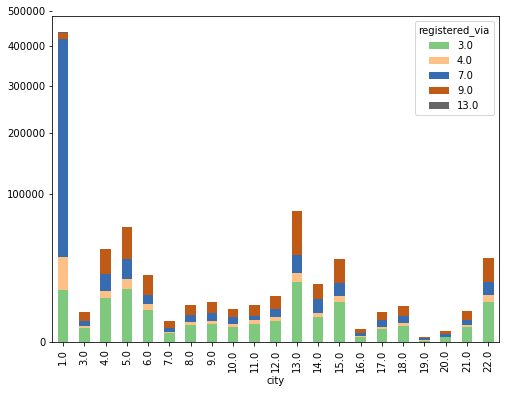

In [3]:
fig,ax =plt.subplots(figsize=(8,6))
pd.crosstab(df_train.city,df_train.registered_via,dropna=True)\
.plot(kind='bar',stacked=True,ax=ax,colormap='Accent')
ax.set_yscale('squareroot')
plt.show()
# two ways to get color
# plt.style all sucks expect seaborn-pastel
# use colormap argument then pass a string

In [21]:
# pd.crosstab?

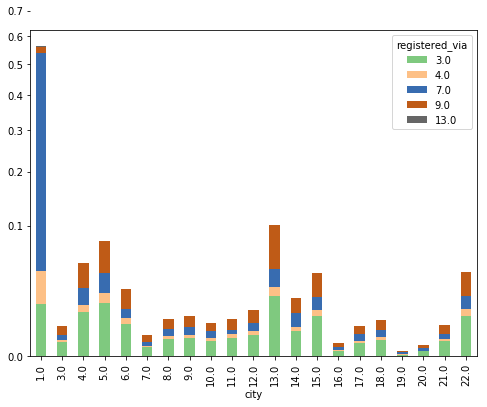

In [22]:
fig,ax =plt.subplots(figsize=(8,6))
pd.crosstab(df_train.city,df_train.registered_via,dropna=True,normalize=True)\
.plot(kind='bar',stacked=True,ax=ax,colormap='Accent')
ax.set_yscale('squareroot')
plt.show()
# two ways to get color
# plt.style all sucks expect seaborn-pastel
# use colormap argument then pass a string

In [23]:
pd.crosstab(df_train.city,df_train.registered_via,dropna=True).iloc[0]

registered_via
3.0      12374
4.0      20623
7.0     387881
9.0      16065
13.0      2791
Name: 1.0, dtype: int64

## crosstab back to normal dataframe

In [24]:
df_train.groupby(by=['registered_via','city'],as_index=False).count().head(5)
# not work = ( )

,registered_via,city,msno,is_churn,bd,gender,registration_init_time
0,3.0,1.0,12374,12374,12374,5301,12374
1,3.0,3.0,946,946,946,832,946
2,3.0,4.0,8850,8850,8850,7919,8850
3,3.0,5.0,13099,13099,13099,11551,13099
4,3.0,6.0,4890,4890,4890,4418,4890


# Pivot_table and plot

# GroupBy and plot

* check the as_index = False to make result is also a dataframe in **groupby**

In [25]:
# groupby options matter ! as_index = True (defult)
df1  = df_train[['registered_via','is_churn']].groupby(['registered_via']).mean()
# groupby options matter ! as_index = False 
df2 = df_train[['registered_via','is_churn']].groupby(by=['registered_via'],as_index=False).mean()
display_side_by_side(df1, df2)
# the back one make us easy to futher steps

is_churn 
 
 
 registered_via 
 
 
 
 
 
 3.0 
 0.135634 
 
 
 4.0 
 0.175386 
 
 
 7.0 
 0.011687 
 
 
 9.0 
 0.086887 
 
 
 13.0 
 0.049338 
 
 
 
 
 
 
 registered_via 
 is_churn 
 
 
 
 
 0 
 3.0 
 0.135634 
 
 
 1 
 4.0 
 0.175386 
 
 
 2 
 7.0 
 0.011687 
 
 
 3 
 9.0 
 0.086887 
 
 
 4 
 13.0 
 0.049338

In [26]:
df_train[['registered_via','is_churn']].groupby(by=['registered_via'],as_index=False).\
mean().sort_values(by='is_churn',ascending=False)

,registered_via,is_churn
1,4.0,0.175386
0,3.0,0.135634
3,9.0,0.086887
4,13.0,0.049338
2,7.0,0.011687


## with both mean and std

In [28]:
#pd.DataFrame.groupby?

Parameters by: mapping,function,str, or iterable 

we can pass function, dict, series --> determine tge groups

ndarray, str,list --> group by the columns

In [29]:
# pass a dictionary as function 
f = {'is_churn': ['mean','std']}
df3 = df_train[['registered_via','is_churn']].groupby(by=['registered_via'],as_index=False).agg(f)
df3

registered_via  is_churn          
                      mean       std
0            3.0  0.135634  0.342401
1            4.0  0.175386  0.380301
2            7.0  0.011687  0.107472
3            9.0  0.086887  0.281669
4           13.0  0.049338  0.216608

In [30]:
# index
display(df3['registered_via'])
# columns is a multi-index-object
display(df3['is_churn'])
# index in multi-index-object use loc.['index','column']
df3.loc[1,'is_churn']
# the second level in muitl-index
df3['is_churn','std'] # ['first level','second level']

0     3.0
1     4.0
2     7.0
3     9.0
4    13.0
Name: registered_via, dtype: float64

,mean,std
0,0.135634,0.342401
1,0.175386,0.380301
2,0.011687,0.107472
3,0.086887,0.281669
4,0.049338,0.216608


0    0.342401
1    0.380301
2    0.107472
3    0.281669
4    0.216608
Name: (is_churn, std), dtype: float64

## Filter the deplicate df

In [218]:
grouped = df4.groupby(by=['A'])
# take out the first
index = [gp_keys[0] for gp_keys in grouped.groups.values()]
unique_df = df4.reindex(index)

In [219]:
unique_df

,A,B
0,1,10.000000
1,2,14.444444


[article](https://scentellegher.github.io/programming/2017/07/15/pandas-groupby-multiple-columns-plot.html)

# Large Scale data

In [45]:
# read with chunks
# -----------------------------
# reader, set iterator = true
reader = pd.read_csv('members_v3.gzip',iterator=True,compression='gzip')

# use while loop, chunkszie by exp , performed better when 5~15 dataframe concat
# alias chunk_tot means chunk_total instead of chunks which is more to distingwish

loop = True
chunksize = 2e5
chunk_tot = []
while loop:
  try:
    chunk = reader.get_chunk(chunksize)
    chunk_tot.append(chunk)
  except StopIteration:
      loop = False
      print("Interation is stopped")
df = pd.concat(chunk_tot,ignore_index=True)

Interation is stopped


In [46]:
del df 

## sampleing reading

In [49]:
import random
p = 0.4  # 1% of the lines
# keep the header, then take only 1% of lines
# if random from [0,1] interval is greater than 0.01 the row will be skipped
filename = 'members_v3.gzip'
df = pd.read_csv(
         filename,
         compression='gzip',
         header=0, 
         skiprows=lambda i: i>0 and random.random() > p)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2708893 entries, 0 to 2708892
Data columns (total 6 columns):
msno                      object
city                      int64
bd                        int64
gender                    object
registered_via            int64
registration_init_time    int64
dtypes: int64(4), object(2)
memory usage: 124.0+ MB


## change datatype

### object

In [51]:
df.select_dtypes(include=['object']).columns

Index(['msno', 'gender'], dtype='object')

In [52]:
print('unique ratio : %.3f' %(len(df.msno.unique()) / df.shape[0]) )

unique ratio : 1.000


In [53]:
# unique ratio under 0.5 then use category
df_obj = df.select_dtypes(include=['object'])
converted_obj = pd.DataFrame()
for col in df_obj.columns:
    # unique only works on pd.Series
    num_unique = len( df_obj[col].unique() )
    num_total  = len(df_obj[col])
    if num_unique / num_total < 0.5:
        # loc is slow but needed
        converted_obj.loc[:,col] = df_obj[col].astype('category')
    else:
        converted_obj.loc[:,col] = df_obj[col]

In [54]:
converted_obj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2708893 entries, 0 to 2708892
Data columns (total 2 columns):
msno      object
gender    category
dtypes: category(1), object(1)
memory usage: 23.3+ MB


### numbers (int & float)

In [55]:
# int 
df_int = df.select_dtypes(include=['int64'])

In [57]:
# pd.to_numeric?
# checking the dtype useing uint only positive and long , int negative and positive but short

In [58]:
# pd.to_numeric function
converted_int = df_int.apply(pd.to_numeric,downcast='unsigned')
# float just do the same over again

In [59]:
converted_int.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2708893 entries, 0 to 2708892
Data columns (total 4 columns):
city                      uint8
bd                        int64
registered_via            uint8
registration_init_time    uint32
dtypes: int64(1), uint32(1), uint8(2)
memory usage: 36.2 MB


### dtype dictionary

In [60]:
# concat
optimized_df = pd.concat([converted_obj,converted_int],axis=1)
# dtypes to values
dtypes = optimized_df.dtypes
# dtype_col to key
dtype_col = dtypes.index
# dtyle list useing list comprehesion
dtypes_type = [i.name
              for i in dtypes.values]
# zip up for dictionary
columns_type = dict(zip(dtype_col, dtypes_type))
columns_type

{'msno': 'object',
 'gender': 'category',
 'city': 'uint8',
 'bd': 'int64',
 'registered_via': 'uint8',
 'registration_init_time': 'uint32'}

In [61]:
# if there are a lot of columns
# dictionary comprehesion
# preview = {key: value for key, value in list(columns_type.keys())[:3]}

In [63]:
# read with chunks
# pass columns_type
reader = pd.read_csv('members_v3.gzip',dtype=columns_type,compression='gzip',iterator=True)
# pass category with chunk together is a bad idea!

loop = True
chunksize = 2e6
chunk_tot = []
while loop:
  try:
    chunk = reader.get_chunk(chunksize)
    chunk_tot.append(chunk)
  except StopIteration:
      loop = False
      print("Interation is stopped")
optimized_df = pd.concat(chunk_tot,ignore_index=True)

Interation is stopped


In [64]:
optimized_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6769473 entries, 0 to 6769472
Data columns (total 6 columns):
msno                      object
city                      uint8
bd                        int64
gender                    category
registered_via            uint8
registration_init_time    uint32
dtypes: category(1), int64(1), object(1), uint32(1), uint8(2)
memory usage: 148.5+ MB


In [66]:
# optimized_df.msno = optimized_df.msno.astype('category')

In [67]:
optimized_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6769473 entries, 0 to 6769472
Data columns (total 6 columns):
msno                      object
city                      uint8
bd                        int64
gender                    category
registered_via            uint8
registration_init_time    uint32
dtypes: category(1), int64(1), object(1), uint32(1), uint8(2)
memory usage: 148.5+ MB
